In [1]:
import numpy as np
import pandas as pd
import json 
from urllib.request import urlopen
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cat_open = urlopen('https://raw.githubusercontent.com/anyoneai/e-commerce-open-data-set/master/categories.json')
prod_open = urlopen('https://raw.githubusercontent.com/anyoneai/e-commerce-open-data-set/master/products.json')

js_cat = json.loads(cat_open.read().decode('utf-8'))
js_prod = json.loads(prod_open.read().decode('utf-8'))

In [3]:
df_cat = pd.DataFrame(js_cat)
df_prod = pd.DataFrame(js_prod)

# Category Data

In [4]:
df_cat

,id,name,path,subCategories
0,abcat0010000,Gift Ideas,"[{'id': 'abcat0010000', 'name': 'Gift Ideas'}]","[{'id': 'pcmcat140000050035', 'name': 'Capturi..."
1,abcat0020001,Learning Toys,"[{'id': 'abcat0010000', 'name': 'Gift Ideas'},...",[]
2,abcat0020002,DVD Games,"[{'id': 'abcat0010000', 'name': 'Gift Ideas'},...",[]
3,abcat0020004,Unique Gifts,"[{'id': 'abcat0010000', 'name': 'Gift Ideas'},...",[]
4,abcat0100000,TV & Home Theater,"[{'id': 'abcat0100000', 'name': 'TV & Home The...","[{'id': 'abcat0101000', 'name': 'TVs'}, {'id':..."
...,...,...,...,...
4579,pcmcat86300050019,New Sony Blu-ray Disc Player,"[{'id': 'pcmcat128500050004', 'name': 'Name Br...","[{'id': 'pcmcat86300050020', 'name': 'Movies C..."
4580,pcmcat86300050020,Movies Coming to Blu-ray Disc,"[{'id': 'pcmcat128500050004', 'name': 'Name Br...",[]
4581,pcmcat86500050000,Blu-ray Disc and DVD-Video Comparison,"[{'id': 'pcmcat128500050004', 'name': 'Name Br...",[]
4582,pcmcat87800050001,Customer Service,"[{'id': 'pcmcat87800050001', 'name': 'Customer...","[{'id': 'pcmcat203400050001', 'name': 'Help'}]"


In [5]:
# Leaves categories
leaf_cat_id = []
for index, row in df_cat.iterrows():
  if df_cat['subCategories'][index] == []:
    leaf_cat_id.append(df_cat['id'][index])

print (f"Number of categories which are leaves: {len(leaf_cat_id)}")

Number of categories which are leaves: 3790


In [6]:
print(f"""Number of unique categories based on name column: {df_cat['name'].nunique()}
Number of unique categories based on id column: {df_cat['id'].nunique()}
From this we can assume that there are repeated names
""")

Number of unique categories based on name column: 4227
Number of unique categories based on id column: 4584
From this we can assume that there are repeated names



# Product Data


In [7]:
print(df_prod.shape)
df_prod

(51646, 12)


,sku,name,type,price,upc,category,shipping,description,manufacturer,model,url,image
0,43900,Duracell - AAA Batteries (4-Pack),HardGood,5.49,041333424019,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,Compatible with select electronic devices; AAA...,Duracell,MN2400B4Z,http://www.bestbuy.com/site/duracell-aaa-batte...,http://img.bbystatic.com/BestBuy_US/images/pro...
1,48530,Duracell - AA 1.5V CopperTop Batteries (4-Pack),HardGood,5.49,041333415017,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,Long-lasting energy; DURALOCK Power Preserve t...,Duracell,MN1500B4Z,http://www.bestbuy.com/site/duracell-aa-1-5v-c...,http://img.bbystatic.com/BestBuy_US/images/pro...
2,127687,Duracell - AA Batteries (8-Pack),HardGood,7.49,041333825014,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,Compatible with select electronic devices; AA ...,Duracell,MN1500B8Z,http://www.bestbuy.com/site/duracell-aa-batter...,http://img.bbystatic.com/BestBuy_US/images/pro...
3,150115,Energizer - MAX Batteries AA (4-Pack),HardGood,4.99,039800011329,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,4-pack AA alkaline batteries; battery tester i...,Energizer,E91BP-4,http://www.bestbuy.com/site/energizer-max-batt...,http://img.bbystatic.com/BestBuy_US/images/pro...
4,185230,Duracell - C Batteries (4-Pack),HardGood,8.99,041333440019,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,Compatible with select electronic devices; C s...,Duracell,MN1400R4Z,http://www.bestbuy.com/site/duracell-c-batteri...,http://img.bbystatic.com/BestBuy_US/images/pro...
...,...,...,...,...,...,...,...,...,...,...,...,...
51641,9995663,Honeywell - True HEPA Replacement Filters for ...,HardGood,49.99,092926500023,"[{'id': 'abcat0900000', 'name': 'Appliances'},...",0,Compatible with select Honeywell air purifier ...,Honeywell,HRF-N2,http://www.bestbuy.com/site/honeywell-true-hep...,http://img.bbystatic.com/BestBuy_US/images/pro...
51642,9996238,Dyson - Hard Floor Wipes for Dyson Hard DC56 V...,HardGood,6.99,879957008960,"[{'id': 'abcat0900000', 'name': 'Appliances'},...",5.99,Removes dirt and grime from hard floors; cloth...,Dyson,965383-01,http://www.bestbuy.com/site/dyson-hard-floor-w...,http://img.bbystatic.com/BestBuy_US/images/pro...
51643,9996826,Aleratec - Drive Enclosure - Internal - Black,HardGood,35.99,808068004295,"[{'id': 'abcat0500000', 'name': 'Computers & T...",0,"1 x Total Bay - 1 x 2.5"" Bay",Aleratec,350106,http://www.bestbuy.com/site/aleratec-drive-enc...,http://img.bbystatic.com/BestBuy_US/images/pro...
51644,9999119,Amazon - Fire TV Stick,HardGood,39.99,848719037869,"[{'id': 'abcat0100000', 'name': 'TV & Home The...",0,"Streams 1080p content; dual-band, dual-antenna...",Amazon,53-002444,http://www.bestbuy.com/site/amazon-fire-tv-sti...,http://img.bbystatic.com/BestBuy_US/images/pro...


The entire data set has 51646 entries and 12 columns. 

First, we focus on the "category" column of our dataset. In order to do so we consider only the "name" and "category" columns 

**Note:** "description" and "image" columns are kept but they going to be considered in further steps)

In [8]:
#columns to drop
ni_cat = ['sku', 'type', 'price', 'upc', 'shipping', 'manufacturer', 'model', 'url']
df_prod_cat = df_prod.drop(columns= ni_cat)

In [9]:
df_prod_cat

,name,category,description,image
0,Duracell - AAA Batteries (4-Pack),"[{'id': 'pcmcat312300050015', 'name': 'Connect...",Compatible with select electronic devices; AAA...,http://img.bbystatic.com/BestBuy_US/images/pro...
1,Duracell - AA 1.5V CopperTop Batteries (4-Pack),"[{'id': 'pcmcat312300050015', 'name': 'Connect...",Long-lasting energy; DURALOCK Power Preserve t...,http://img.bbystatic.com/BestBuy_US/images/pro...
2,Duracell - AA Batteries (8-Pack),"[{'id': 'pcmcat312300050015', 'name': 'Connect...",Compatible with select electronic devices; AA ...,http://img.bbystatic.com/BestBuy_US/images/pro...
3,Energizer - MAX Batteries AA (4-Pack),"[{'id': 'pcmcat312300050015', 'name': 'Connect...",4-pack AA alkaline batteries; battery tester i...,http://img.bbystatic.com/BestBuy_US/images/pro...
4,Duracell - C Batteries (4-Pack),"[{'id': 'pcmcat312300050015', 'name': 'Connect...",Compatible with select electronic devices; C s...,http://img.bbystatic.com/BestBuy_US/images/pro...
...,...,...,...,...
51641,Honeywell - True HEPA Replacement Filters for ...,"[{'id': 'abcat0900000', 'name': 'Appliances'},...",Compatible with select Honeywell air purifier ...,http://img.bbystatic.com/BestBuy_US/images/pro...
51642,Dyson - Hard Floor Wipes for Dyson Hard DC56 V...,"[{'id': 'abcat0900000', 'name': 'Appliances'},...",Removes dirt and grime from hard floors; cloth...,http://img.bbystatic.com/BestBuy_US/images/pro...
51643,Aleratec - Drive Enclosure - Internal - Black,"[{'id': 'abcat0500000', 'name': 'Computers & T...","1 x Total Bay - 1 x 2.5"" Bay",http://img.bbystatic.com/BestBuy_US/images/pro...
51644,Amazon - Fire TV Stick,"[{'id': 'abcat0100000', 'name': 'TV & Home The...","Streams 1080p content; dual-band, dual-antenna...",http://img.bbystatic.com/BestBuy_US/images/pro...


As second step, we decide to focus on leaves categories, that categories assigned to product which does not have subcategories inside. In order to do that iterate over the dictionaries in this column. 
Based on the information extracted e add the folowwing columns:
- `"id_cat_prod"`: id assigned to each leaf category
- `"name_cat_prod"`: name assigned to each leaf category

We decide to focused on `"id_cat_prod"` column because, as we saw earlier, there are some names categories assigned to different kinds of products (repeated names)

In [10]:
#Extracting names and id of leaf categories 
prod_cat_id_list = []
prod_cat_nm_list = []
for index, rows in df_prod_cat.iterrows():
    id_dict = df_prod_cat['category'][index][-1]
    prod_cat_id_list.append(str(id_dict['id']))
    prod_cat_nm_list.append(str(id_dict['name']))

In [11]:
#Adding the new columns 
df_prod_cat['id_cat_prod'] = prod_cat_id_list
df_prod_cat['nm_cat_prod'] = prod_cat_nm_list
df_prod_cat

,name,category,description,image,id_cat_prod,nm_cat_prod
0,Duracell - AAA Batteries (4-Pack),"[{'id': 'pcmcat312300050015', 'name': 'Connect...",Compatible with select electronic devices; AAA...,http://img.bbystatic.com/BestBuy_US/images/pro...,abcat0208002,Alkaline Batteries
1,Duracell - AA 1.5V CopperTop Batteries (4-Pack),"[{'id': 'pcmcat312300050015', 'name': 'Connect...",Long-lasting energy; DURALOCK Power Preserve t...,http://img.bbystatic.com/BestBuy_US/images/pro...,abcat0208002,Alkaline Batteries
2,Duracell - AA Batteries (8-Pack),"[{'id': 'pcmcat312300050015', 'name': 'Connect...",Compatible with select electronic devices; AA ...,http://img.bbystatic.com/BestBuy_US/images/pro...,abcat0208002,Alkaline Batteries
3,Energizer - MAX Batteries AA (4-Pack),"[{'id': 'pcmcat312300050015', 'name': 'Connect...",4-pack AA alkaline batteries; battery tester i...,http://img.bbystatic.com/BestBuy_US/images/pro...,abcat0208002,Alkaline Batteries
4,Duracell - C Batteries (4-Pack),"[{'id': 'pcmcat312300050015', 'name': 'Connect...",Compatible with select electronic devices; C s...,http://img.bbystatic.com/BestBuy_US/images/pro...,abcat0208002,Alkaline Batteries
...,...,...,...,...,...,...
51641,Honeywell - True HEPA Replacement Filters for ...,"[{'id': 'abcat0900000', 'name': 'Appliances'},...",Compatible with select Honeywell air purifier ...,http://img.bbystatic.com/BestBuy_US/images/pro...,pcmcat303700050016,Air Purifier Filters & Parts
51642,Dyson - Hard Floor Wipes for Dyson Hard DC56 V...,"[{'id': 'abcat0900000', 'name': 'Appliances'},...",Removes dirt and grime from hard floors; cloth...,http://img.bbystatic.com/BestBuy_US/images/pro...,abcat0916009,Cleaning Solutions
51643,Aleratec - Drive Enclosure - Internal - Black,"[{'id': 'abcat0500000', 'name': 'Computers & T...","1 x Total Bay - 1 x 2.5"" Bay",http://img.bbystatic.com/BestBuy_US/images/pro...,pcmcat186100050005,External Hard Drives
51644,Amazon - Fire TV Stick,"[{'id': 'abcat0100000', 'name': 'TV & Home The...","Streams 1080p content; dual-band, dual-antenna...",http://img.bbystatic.com/BestBuy_US/images/pro...,pcmcat748301694435,Remote TV Streaming


In [12]:
# number of leaves, that is of categories with no further subcategories
total_prod = len(df_prod_cat)
total_cat = df_prod_cat['id_cat_prod'].nunique()
print(f"There are {total_cat} leaves categories")

There are 1667 leaves categories


In [13]:
# number of products per category
print(f"""Amounts of products per categories:
{df_prod_cat['id_cat_prod'].value_counts()}""")

Amounts of products per categories:
pcmcat232900050017    3556
abcat0811006          1845
pcmcat214700050000    1471
pcmcat165900050033     739
pcmcat367400050001     689
                      ... 
pcmcat205700050032       1
pcmcat748300670708       1
pcmcat748300811166       1
pcmcat284400050063       1
pcmcat265900050009       1
Name: id_cat_prod, Length: 1667, dtype: int64


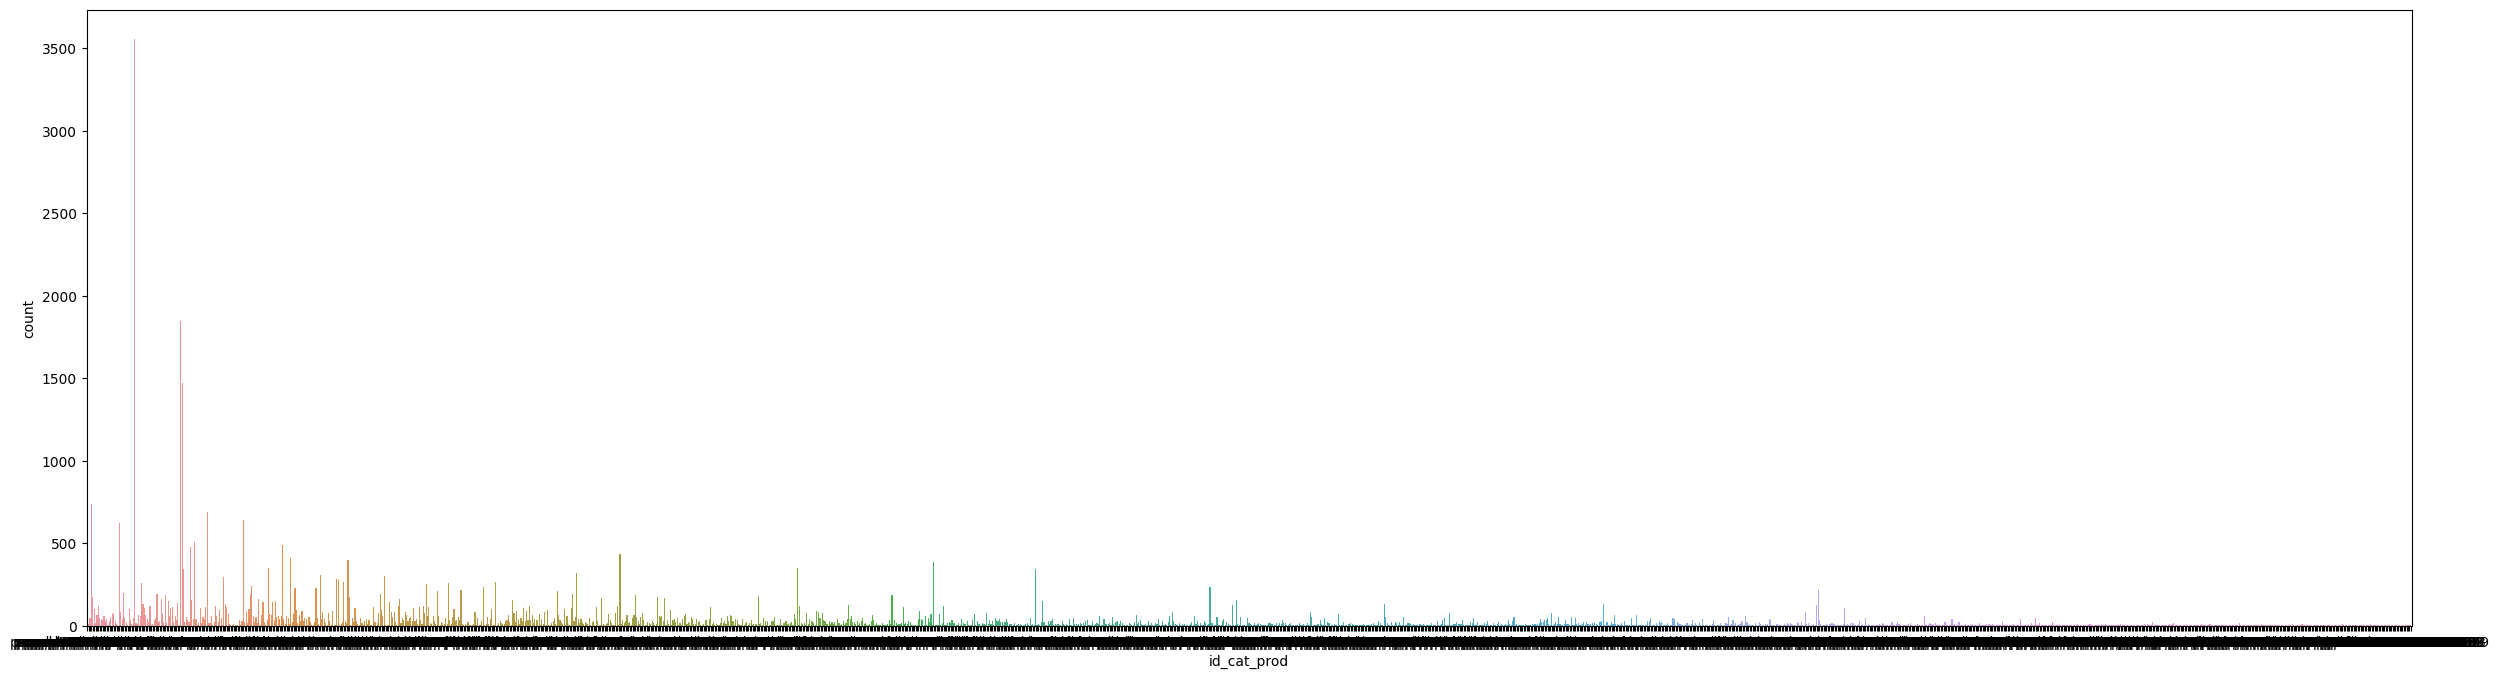

In [14]:
fig, ax = plt.subplots(figsize=(30, 8))
sns.countplot(data= df_prod_cat, x=df_prod_cat['id_cat_prod'])
plt.show()

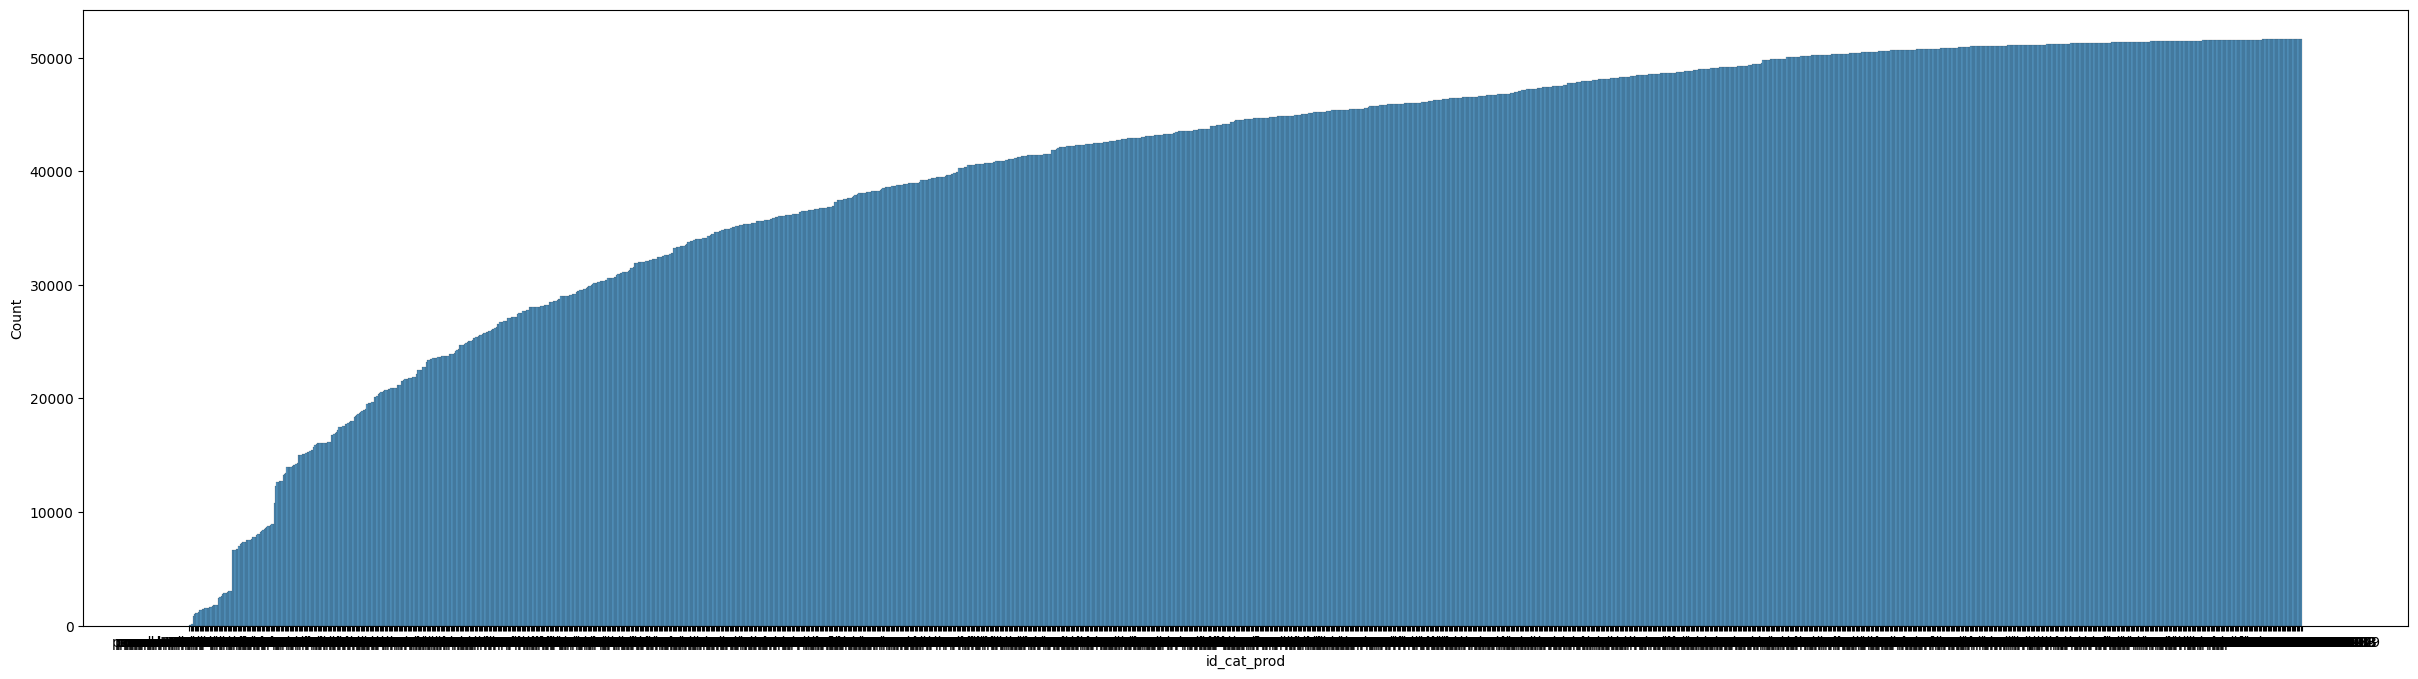

In [15]:
fig, ax = plt.subplots(figsize=(30, 8))
sns.histplot(data= df_prod_cat, x=df_prod_cat['id_cat_prod'], cumulative=True)
plt.show()


**Categories with little amount of products** 

In [16]:
df_prod_cat['id_cat_prod'].value_counts()

pcmcat232900050017    3556
abcat0811006          1845
pcmcat214700050000    1471
pcmcat165900050033     739
pcmcat367400050001     689
                      ... 
pcmcat205700050032       1
pcmcat748300670708       1
pcmcat748300811166       1
pcmcat284400050063       1
pcmcat265900050009       1
Name: id_cat_prod, Length: 1667, dtype: int64

**Making a data frame to determine where we are going to set the treshold**

In [17]:
prod_per_cat = pd.DataFrame(df_prod_cat['id_cat_prod'].value_counts())
prod_per_cat.rename(columns = {'id_cat_prod':'total_prod'}, inplace = True)
nm_cat_less10 = prod_per_cat[prod_per_cat['total_prod'] < 10]
sum_prod_cat_less = prod_per_cat[prod_per_cat['total_prod'] < 10].sum()[0]

In [18]:
print(f"""There are {len(nm_cat_less10)} leaves categories ({round((len(nm_cat_less10)/total_cat)*100)}% of all leaves categories) with less than 10 products. 
These categories sum up {sum_prod_cat_less} products ({round((sum_prod_cat_less/total_prod)*100)}% of total products). 
""")

There are 920 leaves categories (55% of all leaves categories) with less than 10 products. 
These categories sum up 3144 products (6% of total products). 



In [19]:
# Create the list of categories to assign "others" 
cat_to_others = []
for items in range(len(nm_cat_less10)):
   cat = nm_cat_less10['total_prod'].index[items]
   cat_to_others.append(cat)

### First version of the dataset that we are going to use to train our baselines models

In [20]:
prod_cat_v1 = df_prod_cat.copy()

In [21]:
for row, index in prod_cat_v1.iterrows():
    row_value = prod_cat_v1['id_cat_prod'][row]
    row_value_nm = prod_cat_v1['nm_cat_prod'][row]
    if row_value in cat_to_others:
       prod_cat_v1.replace({'id_cat_prod': row_value}, 'OTHER', inplace=True)
       prod_cat_v1.replace({'nm_cat_prod': row_value_nm}, 'OTHER', inplace=True) #we can modify this line and replace the id_cat_prod with the category at the immediate upper level instead of replace with "other"
    else:
        continue

In [22]:
prod_cat_v1

,name,category,description,image,id_cat_prod,nm_cat_prod
0,Duracell - AAA Batteries (4-Pack),"[{'id': 'pcmcat312300050015', 'name': 'Connect...",Compatible with select electronic devices; AAA...,http://img.bbystatic.com/BestBuy_US/images/pro...,abcat0208002,Alkaline Batteries
1,Duracell - AA 1.5V CopperTop Batteries (4-Pack),"[{'id': 'pcmcat312300050015', 'name': 'Connect...",Long-lasting energy; DURALOCK Power Preserve t...,http://img.bbystatic.com/BestBuy_US/images/pro...,abcat0208002,Alkaline Batteries
2,Duracell - AA Batteries (8-Pack),"[{'id': 'pcmcat312300050015', 'name': 'Connect...",Compatible with select electronic devices; AA ...,http://img.bbystatic.com/BestBuy_US/images/pro...,abcat0208002,Alkaline Batteries
3,Energizer - MAX Batteries AA (4-Pack),"[{'id': 'pcmcat312300050015', 'name': 'Connect...",4-pack AA alkaline batteries; battery tester i...,http://img.bbystatic.com/BestBuy_US/images/pro...,abcat0208002,Alkaline Batteries
4,Duracell - C Batteries (4-Pack),"[{'id': 'pcmcat312300050015', 'name': 'Connect...",Compatible with select electronic devices; C s...,http://img.bbystatic.com/BestBuy_US/images/pro...,abcat0208002,Alkaline Batteries
...,...,...,...,...,...,...
51641,Honeywell - True HEPA Replacement Filters for ...,"[{'id': 'abcat0900000', 'name': 'Appliances'},...",Compatible with select Honeywell air purifier ...,http://img.bbystatic.com/BestBuy_US/images/pro...,pcmcat303700050016,Air Purifier Filters & Parts
51642,Dyson - Hard Floor Wipes for Dyson Hard DC56 V...,"[{'id': 'abcat0900000', 'name': 'Appliances'},...",Removes dirt and grime from hard floors; cloth...,http://img.bbystatic.com/BestBuy_US/images/pro...,abcat0916009,Cleaning Solutions
51643,Aleratec - Drive Enclosure - Internal - Black,"[{'id': 'abcat0500000', 'name': 'Computers & T...","1 x Total Bay - 1 x 2.5"" Bay",http://img.bbystatic.com/BestBuy_US/images/pro...,pcmcat186100050005,External Hard Drives
51644,Amazon - Fire TV Stick,"[{'id': 'abcat0100000', 'name': 'TV & Home The...","Streams 1080p content; dual-band, dual-antenna...",http://img.bbystatic.com/BestBuy_US/images/pro...,pcmcat748301694435,Remote TV Streaming


In [32]:
nm_desc = []
for row, index in prod_cat_v1.iterrows():
    cat = str(prod_cat_v1['name'][row])
    desc = prod_cat_v1['description'][row]
    str_concat = cat + ' ' + desc
    nm_desc.append(str_concat)

In [33]:
prod_cat_v1['nm_and_desc'] = nm_desc

In [40]:
prod_cat_v1

,name,category,description,image,id_cat_prod,nm_cat_prod,nm_and_desc
0,Duracell - AAA Batteries (4-Pack),"[{'id': 'pcmcat312300050015', 'name': 'Connect...",Compatible with select electronic devices; AAA...,http://img.bbystatic.com/BestBuy_US/images/pro...,abcat0208002,Alkaline Batteries,Duracell - AAA Batteries (4-Pack) Compatible w...
1,Duracell - AA 1.5V CopperTop Batteries (4-Pack),"[{'id': 'pcmcat312300050015', 'name': 'Connect...",Long-lasting energy; DURALOCK Power Preserve t...,http://img.bbystatic.com/BestBuy_US/images/pro...,abcat0208002,Alkaline Batteries,Duracell - AA 1.5V CopperTop Batteries (4-Pack...
2,Duracell - AA Batteries (8-Pack),"[{'id': 'pcmcat312300050015', 'name': 'Connect...",Compatible with select electronic devices; AA ...,http://img.bbystatic.com/BestBuy_US/images/pro...,abcat0208002,Alkaline Batteries,Duracell - AA Batteries (8-Pack) Compatible wi...
3,Energizer - MAX Batteries AA (4-Pack),"[{'id': 'pcmcat312300050015', 'name': 'Connect...",4-pack AA alkaline batteries; battery tester i...,http://img.bbystatic.com/BestBuy_US/images/pro...,abcat0208002,Alkaline Batteries,Energizer - MAX Batteries AA (4-Pack) 4-pack A...
4,Duracell - C Batteries (4-Pack),"[{'id': 'pcmcat312300050015', 'name': 'Connect...",Compatible with select electronic devices; C s...,http://img.bbystatic.com/BestBuy_US/images/pro...,abcat0208002,Alkaline Batteries,Duracell - C Batteries (4-Pack) Compatible wit...
...,...,...,...,...,...,...,...
51641,Honeywell - True HEPA Replacement Filters for ...,"[{'id': 'abcat0900000', 'name': 'Appliances'},...",Compatible with select Honeywell air purifier ...,http://img.bbystatic.com/BestBuy_US/images/pro...,pcmcat303700050016,Air Purifier Filters & Parts,Honeywell - True HEPA Replacement Filters for ...
51642,Dyson - Hard Floor Wipes for Dyson Hard DC56 V...,"[{'id': 'abcat0900000', 'name': 'Appliances'},...",Removes dirt and grime from hard floors; cloth...,http://img.bbystatic.com/BestBuy_US/images/pro...,abcat0916009,Cleaning Solutions,Dyson - Hard Floor Wipes for Dyson Hard DC56 V...
51643,Aleratec - Drive Enclosure - Internal - Black,"[{'id': 'abcat0500000', 'name': 'Computers & T...","1 x Total Bay - 1 x 2.5"" Bay",http://img.bbystatic.com/BestBuy_US/images/pro...,pcmcat186100050005,External Hard Drives,Aleratec - Drive Enclosure - Internal - Black ...
51644,Amazon - Fire TV Stick,"[{'id': 'abcat0100000', 'name': 'TV & Home The...","Streams 1080p content; dual-band, dual-antenna...",http://img.bbystatic.com/BestBuy_US/images/pro...,pcmcat748301694435,Remote TV Streaming,Amazon - Fire TV Stick Streams 1080p content; ...


In [39]:
#prod_cat_v1.to_csv('products_v1.csv')

In [296]:
prod_cat_v1['id_cat_prod'].nunique()
prod_cat_v1['id_cat_prod'].value_counts()

pcmcat232900050017    3556
OTHER                 3144
abcat0811006          1845
pcmcat214700050000    1471
pcmcat165900050033     739
                      ... 
pcmcat344600050007      10
abcat0508016            10
pcmcat171900050028      10
abcat0107046            10
pcmcat339900050005      10
Name: id_cat_prod, Length: 748, dtype: int64

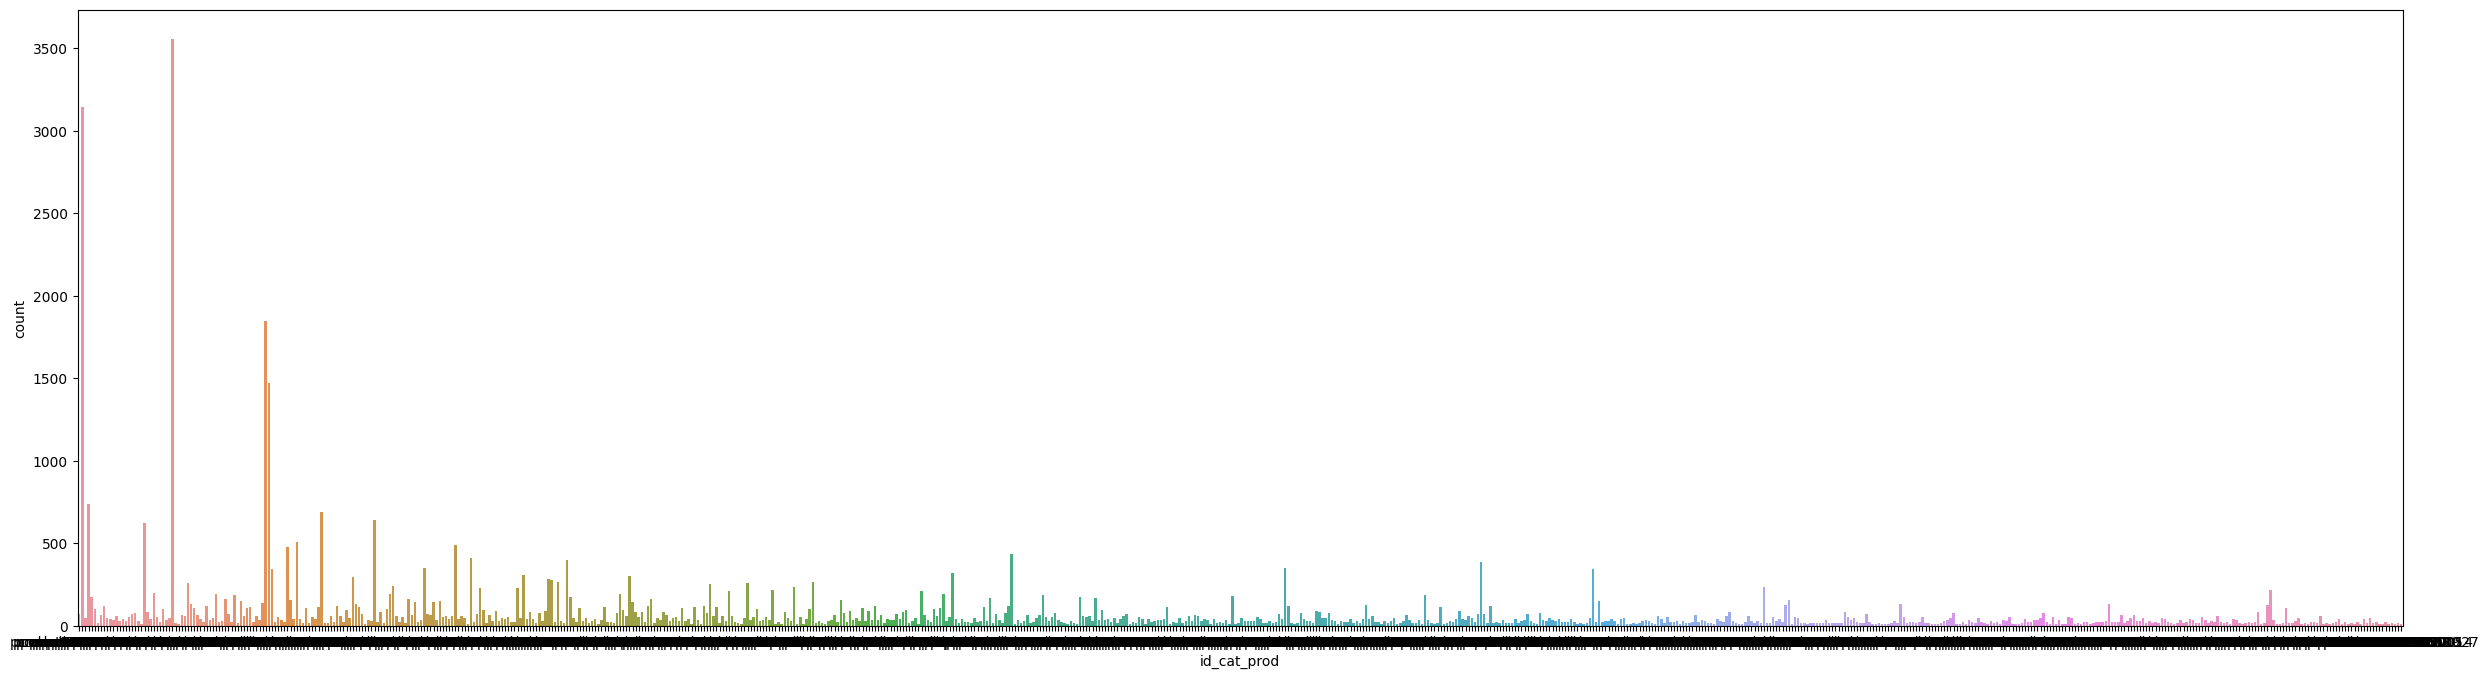

In [297]:
fig, ax = plt.subplots(figsize=(30, 8))
sns.countplot(data= df_prod_cat, x=prod_cat_v1['id_cat_prod'])
plt.show()

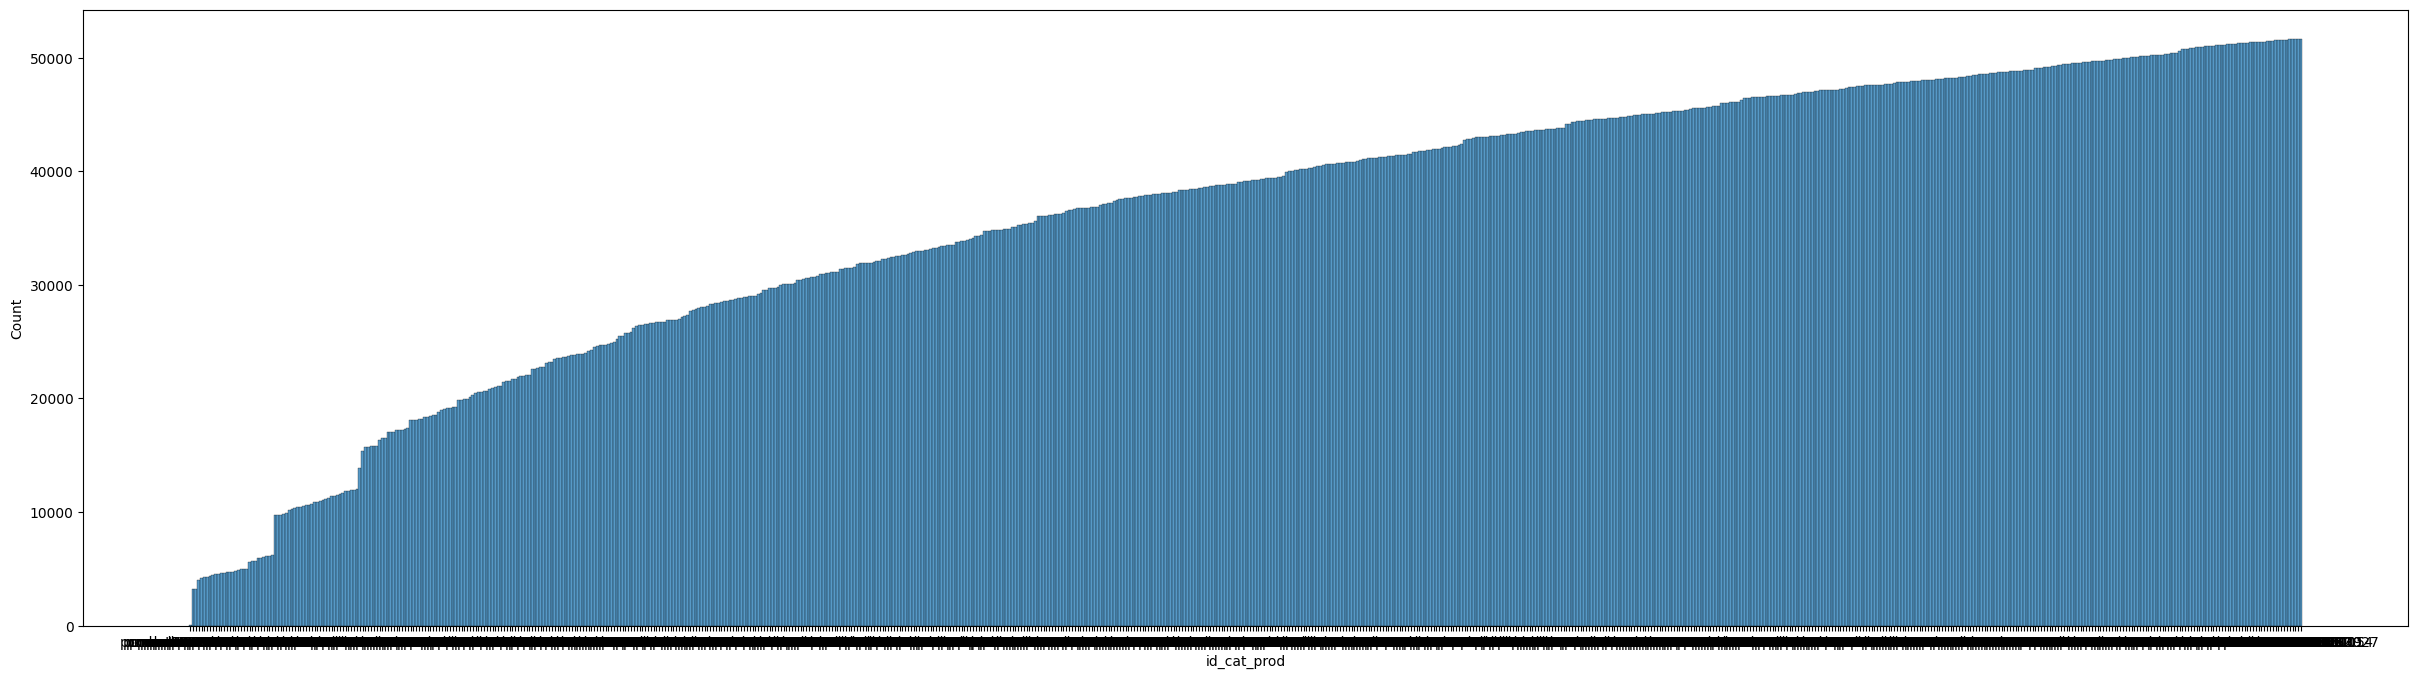

In [298]:
fig, ax = plt.subplots(figsize=(30, 8))
sns.histplot(data= df_prod_cat, x=prod_cat_v1['id_cat_prod'], cumulative=True)
plt.show()

**Note**: "OTHER" is assigned to 3144 products of our dataset representing 6% of the dataset. However, this makes "OTHERS" the second most frequent category and is expected to affect the model.
As a first approach, we decided to keep "OTHER" category in order to start training our baseline models and in parallel try a better replacement for the original categories with less than 10 products

### Categories by hierarchical level

With the aim of generating a better category assignation to the original categories with less than 10 products here, we explore the "category" column attending to its hierarchical structure

In [20]:
# id_prod by hierarchical level
level_cat = []
for index, rows in df_prod_cat.iterrows():
    level = len(df_prod_cat['category'][index])
    level_cat.append(level)

In [21]:
# adding a column with the level
df_prod_cat['deep_cat'] = level_cat

In [22]:
df_prod_cat

,name,category,id_prod,deep_cat
0,Duracell - AAA Batteries (4-Pack),"[{'id': 'pcmcat312300050015', 'name': 'Connect...",abcat0208002,4
1,Duracell - AA 1.5V CopperTop Batteries (4-Pack),"[{'id': 'pcmcat312300050015', 'name': 'Connect...",abcat0208002,4
2,Duracell - AA Batteries (8-Pack),"[{'id': 'pcmcat312300050015', 'name': 'Connect...",abcat0208002,4
3,Energizer - MAX Batteries AA (4-Pack),"[{'id': 'pcmcat312300050015', 'name': 'Connect...",abcat0208002,4
4,Duracell - C Batteries (4-Pack),"[{'id': 'pcmcat312300050015', 'name': 'Connect...",abcat0208002,4
...,...,...,...,...
51641,Honeywell - True HEPA Replacement Filters for ...,"[{'id': 'abcat0900000', 'name': 'Appliances'},...",pcmcat303700050016,3
51642,Dyson - Hard Floor Wipes for Dyson Hard DC56 V...,"[{'id': 'abcat0900000', 'name': 'Appliances'},...",abcat0916009,4
51643,Aleratec - Drive Enclosure - Internal - Black,"[{'id': 'abcat0500000', 'name': 'Computers & T...",pcmcat186100050005,4
51644,Amazon - Fire TV Stick,"[{'id': 'abcat0100000', 'name': 'TV & Home The...",pcmcat748301694435,3


In [23]:
df_prod_cat['deep_cat'].value_counts()

4    20512
3    18845
2     5888
5     5300
1      755
6      345
7        1
Name: deep_cat, dtype: int64

In [24]:
df = df_prod_cat[df_prod_cat['deep_cat'] == 1]

In [25]:
df[df['id_prod'] == 'cat09000']

,name,category,id_prod,deep_cat
4506,"Best Buy GC - $30 Happy Birthday - Play, It's ...","[{'id': 'cat09000', 'name': 'Best Buy Gift Car...",cat09000,1
4507,"Best Buy GC - $75 Happy Birthday - Play, It's ...","[{'id': 'cat09000', 'name': 'Best Buy Gift Car...",cat09000,1
8436,Best Buy GC - $15 Smart-Candle Birthday Gift Card,"[{'id': 'cat09000', 'name': 'Best Buy Gift Car...",cat09000,1
8438,Best Buy GC - $20 Smart-Candle Birthday Gift Card,"[{'id': 'cat09000', 'name': 'Best Buy Gift Car...",cat09000,1
8447,Best Buy GC - $25 Smart-Candle Birthday Gift Card,"[{'id': 'cat09000', 'name': 'Best Buy Gift Car...",cat09000,1
...,...,...,...,...
48876,Best Buy GC - $30 Blue Gift Card,"[{'id': 'cat09000', 'name': 'Best Buy Gift Car...",cat09000,1
48877,Best Buy GC - $50 Blue Gift Card,"[{'id': 'cat09000', 'name': 'Best Buy Gift Car...",cat09000,1
48884,Best Buy GC - $75 Blue Gift Card,"[{'id': 'cat09000', 'name': 'Best Buy Gift Car...",cat09000,1
48885,Best Buy GC - $100 Blue Gift Card,"[{'id': 'cat09000', 'name': 'Best Buy Gift Car...",cat09000,1


In [26]:
df_prod_cat[df_prod_cat['deep_cat'] == 1]

,name,category,id_prod,deep_cat
7,Directed Electronics - Viper Audio Glass Break...,"[{'id': 'pcmcat113100050015', 'name': 'Carfi I...",pcmcat113100050015,1
15,INSTALL - PORTABLE RADAR DETECTOR INST,"[{'id': 'pcmcat298100050010', 'name': 'In-Stor...",pcmcat298100050010,1
777,3M - Filtrete Filter Set for BISSELL Pet Hair ...,"[{'id': 'pcmcat135900050041', 'name': 'Exclusi...",pcmcat135900050041,1
852,"Axion - Axion 7"" Widescreen Portable LCD TV","[{'id': 'pcmcat193100050013', 'name': 'Gadgets'}]",pcmcat193100050013,1
1088,Discovery Kids - Exploration Laptop - Aqua,"[{'id': 'pcmcat252700050006', 'name': 'Toys, G...",pcmcat252700050006,1
...,...,...,...,...
50848,Fable III - Xbox 360,"[{'id': 'pcmcat304300050009', 'name': 'XBox_Bu...",pcmcat304300050009,1
50908,Skate 3 - Xbox 360,"[{'id': 'pcmcat303400050014', 'name': 'H/VG_X3...",pcmcat303400050014,1
51364,Batman: Arkham Asylum Game of the Year Edition...,"[{'id': 'pcmcat303400050014', 'name': 'H/VG_X3...",pcmcat303400050014,1
51531,Star Wars: The Force Unleashed II - Xbox 360,"[{'id': 'pcmcat303400050014', 'name': 'H/VG_X3...",pcmcat303400050014,1
